<a href="https://colab.research.google.com/github/ClarisseAlvarenga/codenation_aceleradev_ds/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [1]:
import pandas as pd
import numpy as np

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

In [3]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
black_friday.shape

(361391, 12)

In [5]:
#conferindo as colunas
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#conferindo os tipos de variável nas colunas
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
#conferindo os dados gerais do DF
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361391 entries, 0 to 361390
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     361391 non-null  int64  
 1   Product_ID                  361391 non-null  object 
 2   Gender                      361391 non-null  object 
 3   Age                         361391 non-null  object 
 4   Occupation                  361391 non-null  int64  
 5   City_Category               361391 non-null  object 
 6   Stay_In_Current_City_Years  361391 non-null  object 
 7   Marital_Status              361391 non-null  int64  
 8   Product_Category_1          361391 non-null  int64  
 9   Product_Category_2          249424 non-null  float64
 10  Product_Category_3          110750 non-null  float64
 11  Purchase                    361391 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 33.1+ MB


In [60]:
#criando um novo DF para mexer sem estragar
dados = black_friday.copy()
dados.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Questão 1: Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple (n_observacoes, n_colunas).

In [9]:
#usando o shape do pandas
dados.shape

(361391, 12)

### Questão 2: Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [10]:
#verificando qual a porcentagem de mulheres e homens, just because
#o dataset tem aproximadamente 75% de homens e 25% de mulheres
dados['Gender'].value_counts(normalize=True)

M    0.753716
F    0.246284
Name: Gender, dtype: float64

In [11]:
#conferindo os tipos de Age
dados['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#fazendo uma query do Pandas
mulheres_jovens = dados.query("Gender == 'F' and Age == '26-35'")
mulheres_jovens.shape[0]

33249

In [61]:
#incluindo a resposta numa variável
r2 = int(mulheres_jovens.shape[0])
r2

33249

### Questão 3: Quantos usuários únicos há no dataset? Responda como um único escalar.

In [62]:
#somando os usuários únicos usando a função nunique do pandas na coluna User_ID
#dados['User_ID'].nunique()
#colocando a resposta numa variável
r3 = int(dados['User_ID'].nunique())
r3

5891

### Questão 4: Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [15]:
#tentando usar o nunique com o dtypes
dados.dtypes.nunique()

3

In [63]:
#incluindo numa variável
r4 = int(dados.dtypes.nunique())
r4

3

### Questão 5: Qual porcentagem dos registros possui ao menos um valor null (None, ǸaN etc)? Responda como um único escalar entre 0 e 1.

In [17]:
#vamos ver um trem aqui
dados.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
361386,False,False,False,False,False,False,False,False,False,False,False,False
361387,False,False,False,False,False,False,False,False,False,True,True,False
361388,False,False,False,False,False,False,False,False,False,False,True,False
361389,False,False,False,False,False,False,False,False,False,True,True,False


In [18]:
#contando os dados não nulos usando o count
nao_nulos = dados.count().sum()
nao_nulos

3974084

In [19]:
#somando os dados nulos - o primeiro sum soma por coluna, o segundo soma tudo
nulos = dados.isna().sum().sum()
nulos

362608

In [20]:
#compilando
total_de_dados = nulos + nao_nulos 
total_de_dados

4336692

In [64]:
#dividindo os nulos pelo total devo ter uma resposta em float - RESPOSTA INCORRETA
r5 = float(nulos/total_de_dados)
r5

0.08361396197839274

In [57]:
#INCLUINDO A RESPOSTA SUGERIDA NO CODE REVIEW
(dados.isnull().sum()/len(dados)).max()

0.693545218336926

### Questão 6: Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [23]:
#contando dados não nulos novamente
dados.count()


User_ID                       361391
Product_ID                    361391
Gender                        361391
Age                           361391
Occupation                    361391
City_Category                 361391
Stay_In_Current_City_Years    361391
Marital_Status                361391
Product_Category_1            361391
Product_Category_2            249424
Product_Category_3            110750
Purchase                      361391
dtype: int64

In [24]:
#conferindo o valor mínimo de dados não nulos
dados.count().min()

110750

In [25]:
#contando nulos na coluna "Product_Category_3"
dados['Product_Category_3'].isna().sum()

250641

In [65]:
#colocando na variável
r6 = int(dados['Product_Category_3'].isna().sum())
r6

250641

### Questão 7: Qual o valor mais frequente (sem contar nulls) em Product_Category_3? Responda como um único escalar.

In [27]:
#usando a moda
dados['Product_Category_3'].mode()[0]

16.0

In [66]:
r7 = dados['Product_Category_3'].mode()[0]
r7

16.0

### Questão 8: Qual a nova média da variável (coluna) Purchase após sua normalização? Responda como um único escalar.

In [29]:
#visualizando a coluna
dados['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
361386    15905
361387    15773
361388     5295
361389     7102
361390    19561
Name: Purchase, Length: 361391, dtype: int64

In [30]:
#contando os nulos
dados['Purchase'].isna().sum()


0

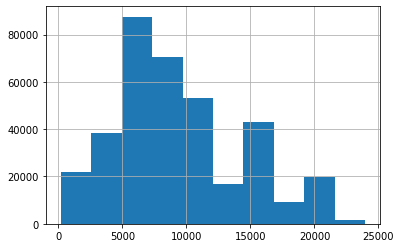

In [31]:
#plotar a distribuição da variável
dados['Purchase'].hist()

In [32]:
#conferindo a média antes
media = dados['Purchase'].mean()
media

9325.319509893716

In [33]:
desvio_padrao = dados['Purchase'].std()

In [34]:
#normalizando pela média 
novos_dados = dados['Purchase']-media/desvio_padrao
novos_dados

0          8368.126312
1         15198.126312
2          1420.126312
3          1055.126312
4          7967.126312
              ...     
361386    15903.126312
361387    15771.126312
361388     5293.126312
361389     7100.126312
361390    19559.126312
Name: Purchase, Length: 361391, dtype: float64

In [35]:
#nova média - normalizando pela média
novos_dados.mean()

9323.44582203544

In [36]:
#normalizando com min max direto com o Pandas = normalized_df=(df-df.min())/(df.max()-df.min()) -optei por não usar o Sklearn para focar no conceito
#criando variável para ficar mais legível
compras = dados['Purchase']
minimo = compras.min()
maximo = compras.max()

compras_normalizado = (compras - minimo)/(maximo - minimo)
compras_normalizado



0         0.344255
1         0.631519
2         0.052027
3         0.036676
4         0.327389
            ...   
361386    0.661171
361387    0.655619
361388    0.214923
361389    0.290924
361390    0.814939
Name: Purchase, Length: 361391, dtype: float64

In [37]:
#média normalizada por mínimo e máximo
compras_normalizado.mean()

0.3844347034780221

In [67]:
#considerando a questão 9, vamos colocar esta resposta como a oficial
r8 = float(compras_normalizado.mean())
r8


0.3844347034780221

### Questão 9: Quantas ocorrências entre -1 e 1 inclusive existem da variáel Purchase após sua padronização? Responda como um único escalar.

#### Resposta incorreta - Não efetuei a padronização dos dados

In [39]:
compras = pd.DataFrame(compras_normalizado)
compras

,Purchase
0,0.344255
1,0.631519
2,0.052027
3,0.036676
4,0.327389
...,...
361386,0.661171
361387,0.655619
361388,0.214923
361389,0.290924


In [40]:
compras.describe()

,Purchase
count,361391.000000
mean,0.384435
std,0.209328
min,0.000000
25%,0.238938
50%,0.331216
75%,0.499706
max,1.000000


In [41]:
compras.isna().sum()

Purchase    0
dtype: int64

In [42]:
#se o valor mínimo é 0 e o valor máximo é 1, então todos os valores estão entre -1 e 1 - ##RESPOSTA INCORRETA
r9 = int(compras.count()[0])
r9

361391

#### Nova tentativa

In [ ]:
#usando a sugestão do CodeReview: fórmula (Padronização = Valor atual - média/desvio_padrão)

In [69]:
padronizacao = (compras - compras.mean())/compras.std()
padronizacao

,Purchase
0,-0.191947
1,1.180369
2,-1.587973
3,-1.661310
4,-0.272518
...,...
361386,1.322021
361387,1.295499
361388,-0.809791
361389,-0.446720


In [71]:
padronizacao.describe()

,Purchase
count,3.613910e+05
mean,5.279552e-14
std,1.000000e+00
min,-1.836517e+00
25%,-6.950630e-01
50%,-2.542341e-01
75%,5.506707e-01
max,2.940671e+00


In [75]:
#criando a query
pesquisa = padronizacao.query("Purchase >= -1 and Purchase <=1")
pesquisa.head()


,Purchase
0,-0.191947
4,-0.272518
9,-0.292209
10,-0.818029
12,-0.653472


In [76]:
#conferindo nulos
pesquisa.isna().sum()

Purchase    0
dtype: int64

In [77]:
#contando os registros
pesquisa.count()

Purchase    234553
dtype: int64

### Questão 10: Podemos afirmar que se uma observação é null em Product_Category_2 ela também o é em Product_Category_3? Responda com um bool (True, False).

In [43]:
#solução roubartilhada
dados_comparacao = dados[dados['Product_Category_2'].isna()]
dados_comparacao
   

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
361379,1001639,P00303042,M,26-35,17,B,1,0,5,NaN,NaN,7110
361383,1001639,P00128742,M,26-35,17,B,1,0,1,NaN,NaN,12042
361385,1001639,P00179142,M,26-35,17,B,1,0,11,NaN,NaN,6142
361387,1001639,P00046642,M,26-35,17,B,1,0,1,NaN,NaN,15773


In [44]:
dados_comparacao['Product_Category_2'].equals(dados_comparacao['Product_Category_3'])

True

In [45]:
q10 = bool(dados_comparacao['Product_Category_2'].equals(dados_comparacao['Product_Category_3']))
q10

True

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [46]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [47]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return int(mulheres_jovens.shape[0])

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [48]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return int(dados['User_ID'].nunique())

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [49]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return int(dados.dtypes.nunique())

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [58]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return float((dados.isnull().sum()/len(dados)).max())

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [51]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return int(dados['Product_Category_3'].isna().sum())

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [52]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return dados['Product_Category_3'].mode()[0]

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [53]:
def q8():
    # Retorne aqui o resultado da questão 8.
    return float(compras_normalizado.mean())

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [78]:
def q9():
    # Retorne aqui o resultado da questão 9.
    return int(pesquisa.count()[0])

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [55]:
def q10():
    # Retorne aqui o resultado da questão 10.
    return bool(dados_comparacao['Product_Category_2'].equals(dados_comparacao['Product_Category_3']))